## INTRODUCTION OF PROJECT 

### Attrbiute Information : 
A. Target feature : Class attribute (categorical) ; 1=Low, 2=Medium, 3=High

B. Independent features : 
1. Speaker origin : Whether the TA is a native English speaker (binary); 1=English speaker, 2=non-English speaker
2. Course instructor (categorical, 25 categories)
3. Semester type : Summer or regular semester (binary); 1=Summer, 2=Regular
4. Class size (numerical)
5. Course (categorical, 26 categories)

### Domain Analysis :

1. Speaker Origin : It tells us about the native language of the teaching assistant(TA).This is an important attribute to 
    consider because if a TA with native langauge English is teaching to non native english speakers it may affect the students performance.
2. Course Instructor : Each course is having its specific instructor who is trained to teach it or who has advanced degree in that specific subject.
3. Semester type :  It tells us whether the semester has a regular(full-time) curriculum or summer(vocational) one.
4. Class size (numerical) : It tells us the number of students present in each class. 
5. Course (categorical, 26 categories): There are 26 categories of courses.
6. Class attribute : This feature categorizes performance of TA as low, medium or high.

## BUSINESS CASE : 

Quality of academic institutions depend upon factors like staff teaching quality and student's achievement. The evaluation of teaching assistant's (TA) performance is essential for academic institutions as it helps to formulate efficient plans to guarantee quality of teachers and improvement of student's performance. The efficiency of TA can be affected because of teaching language, number of students in each class,etc. Using technology it is possible to improve reliability and efficiency of TA's performance evaluation system, provide basis for performance improvement that will optimize student's academic outcome and improve standard of education. So here we will be predicting the performance of TA using efficient machine learning techniques.


## Importing python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing data set

In [2]:
d=pd.read_csv("tae.csv")

In [3]:
d.head()

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [4]:
## Giving column names to the data set
d.columns=["speaker_origin","course_instructor","course","semester_type","class_size","class_attribute"]
d.head()

,speaker_origin,course_instructor,course,semester_type,class_size,class_attribute
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


## BASIC CHECKS

In [5]:
d.tail()

,speaker_origin,course_instructor,course,semester_type,class_size,class_attribute
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1
149,2,2,10,2,27,1


In [6]:
d.shape

(150, 6)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   speaker_origin     150 non-null    int64
 1   course_instructor  150 non-null    int64
 2   course             150 non-null    int64
 3   semester_type      150 non-null    int64
 4   class_size         150 non-null    int64
 5   class_attribute    150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [8]:
d.describe()

,speaker_origin,course_instructor,course,semester_type,class_size,class_attribute
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.813333,13.580000,8.140000,1.853333,27.926667,2.013333
std,0.390949,6.805318,7.034937,0.354958,12.916405,0.819123
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.500000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [9]:
d.isnull().sum()

speaker_origin       0
course_instructor    0
course               0
semester_type        0
class_size           0
class_attribute      0
dtype: int64

#### There are no missing values 

In [10]:
## The data has 4 categorical , 1 numerical feature and target class 
## categorical features : 
d1=d[['speaker_origin', 'course_instructor', 'course', 'semester_type']]
## Numerical feature : 
d2=d['class_size']
## Target variable: 
y=d['class_attribute']

In [11]:
d.speaker_origin.value_counts()

2    122
1     28
Name: speaker_origin, dtype: int64

In [12]:
d.course_instructor.value_counts()

23    16
13    14
22    12
7     11
15     8
9      8
10     8
18     8
6      8
14     8
5      6
20     5
8      5
16     4
17     4
1      4
2      4
25     4
11     3
21     2
4      2
12     2
3      2
24     1
19     1
Name: course_instructor, dtype: int64

In [13]:
d.semester_type.value_counts()

2    128
1     22
Name: semester_type, dtype: int64

In [14]:
d.course.value_counts()

3     44
2     16
1     14
15    10
17    10
11     9
7      7
5      5
8      4
25     3
9      3
21     3
13     3
22     3
16     3
18     2
6      2
14     1
12     1
19     1
23     1
26     1
24     1
20     1
4      1
10     1
Name: course, dtype: int64

In [15]:
d.class_attribute.value_counts()

3    51
2    50
1    49
Name: class_attribute, dtype: int64

## EXPLORATORY DOMAIN ANALYSIS 

### Univariate Analysis : A) Categorical features

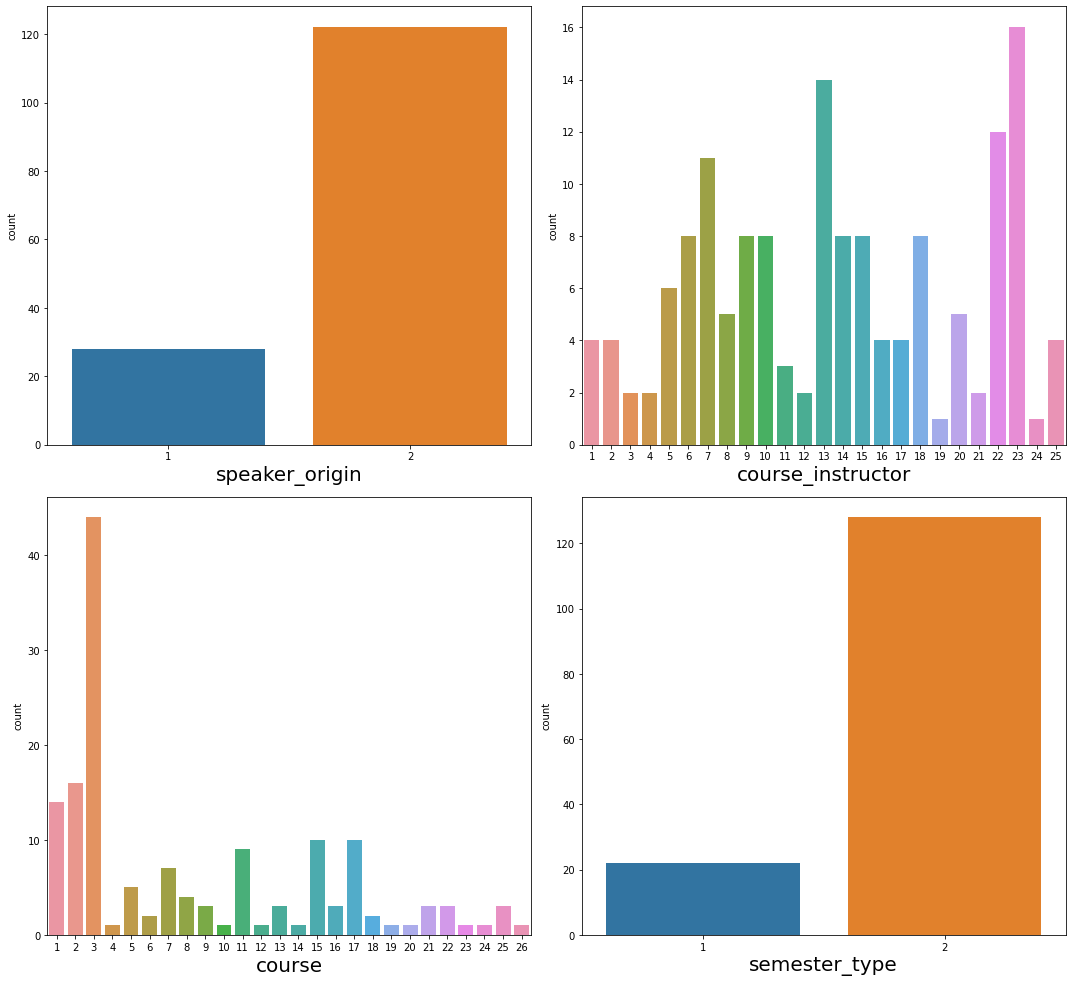

In [16]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15,20), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in d1:
    if plotnumber<=20 :
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(x=d1[column],data=d1)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show ()


### Insights from univariate analysis of categorical features : 

1. Speaker origin 1 (English speaker) and 2 ( non-English Speaker), graphically it is seen that there are more number of non-English Speaker.
2. Non-English Speakers are 122 whereas English Speakers are 28.
3. From the second graph we can say that course instructor category 23 has hightest number of teaching assistants i.e. 16  and course 19 and 24 has lowest (1 TA).
4. Max number of TA (44) belong to course 3. 
5. Instructors took classes more in semester type 2 i.e. regular semesters than in summer semester.

### Univariate Analysis : B) Numerical feature

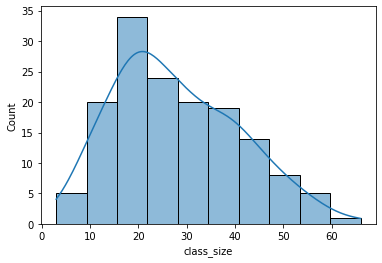

In [17]:
sns.histplot(d['class_size'], kde=True)
plt.show()

### Insights from univariate analysis of numerical feature : 

1. Data is normally distributed.
2. It can be seen that maximum number of classes ( around 34)  is having class size 20.

### Univariate analysis of target variable i.e. class attribute 

<AxesSubplot:xlabel='class_attribute', ylabel='count'>

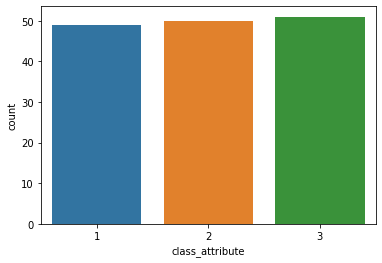

In [18]:
## Checking balance of data 

sns.countplot(x='class_attribute',data=d)

### We can see that this a balanced data having 51,50 and 49 counts of class attribute 3,2 and 1 respectively.


## Bivaraite Analysis : 

### 1. Numerical feature w.r.t. target variable

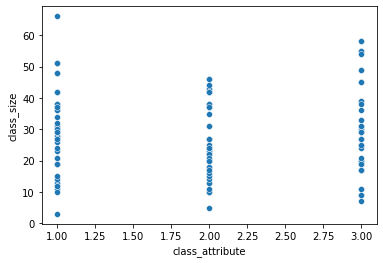

In [19]:
sns.scatterplot(x='class_attribute',y='class_size',data=d)
plt.show()

### Insights : 

1. In the plot it can be seen that class size does not have much effect on class attribute. 
2. Class attribute 1,2,3 has class size rangning from 2-50, 3-45, 10-55 respectively.

### 2. categorical features w.r.t. target variable : a) Speaker origin vs class attribute 

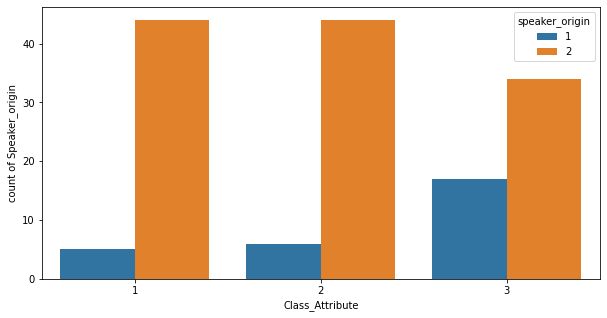

In [20]:
plt.figure(figsize=(10,5), facecolor='white')#To set canvas 
sns.countplot(x='class_attribute', hue='speaker_origin', data=d)
plt.xlabel("Class_Attribute")
plt.ylabel("count of Speaker_origin")
plt.show()


### Insights : 

1. Speaker origin 1 is English Speaker, 2 is non English.
2. It can be infered that among the total 122 non English speakers, 44 teaching assistants belong to low performance,
3. 44 belong to low performance , and 34 to high performance.
4. For total 28 English speaker teaching assistants, 18 no. of people show high performance, 6 people show medium performance
   and 4 people show low performance.  
5. Thus we can infer that if TA is English speaker, there is a proportional chance of high performance.

### b) Semester type vs class attribute 

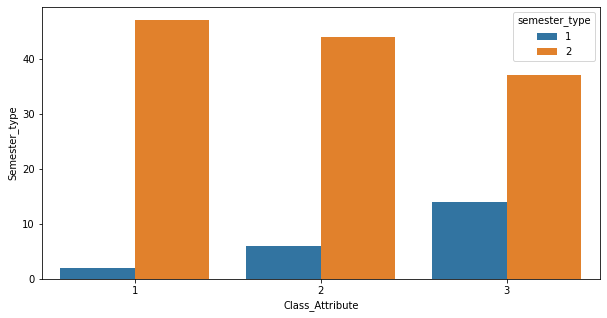

In [21]:
plt.figure(figsize=(10,5), facecolor='white')#To set canvas 
sns.countplot(x='class_attribute', hue='semester_type', data=d)
plt.xlabel("Class_Attribute")
plt.ylabel("Semester_type")
plt.show()
 

### Insights : 

( Sem 1 : Summer, Sem 2: Regular)
1. 128 TA has given regular semesters among which 46, 42 and 34 number of TA belong to performance level 1,2 and 3
   respectively.
2. 22 TA has given summer semesters among those 4, 8, 16 number of TA belong to performance level 1,2 and 3
   respectively.
3. Thus, it can be concluded that TA giving regular semesters has more likely direct proportion to performance level. 

### c) Course vs class attribute 

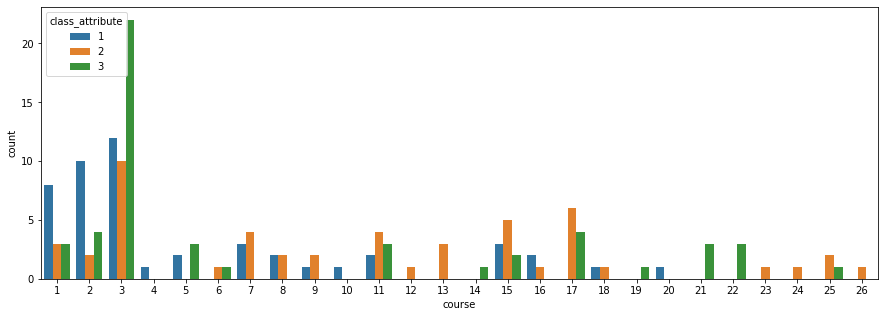

In [22]:
plt.figure(figsize=(15,5), facecolor='white')#To set canvas
sns.countplot(x='course',hue='class_attribute',data=d)
plt.show()

### Insights : 

1. Teaching assistants of Course category 3 has maximum number of class attribute 1 i.e. high performance.
2. Lowest performance is shown by teaching assistants of course category 4,18,20.

### d) Course Instructor vs class attribute 

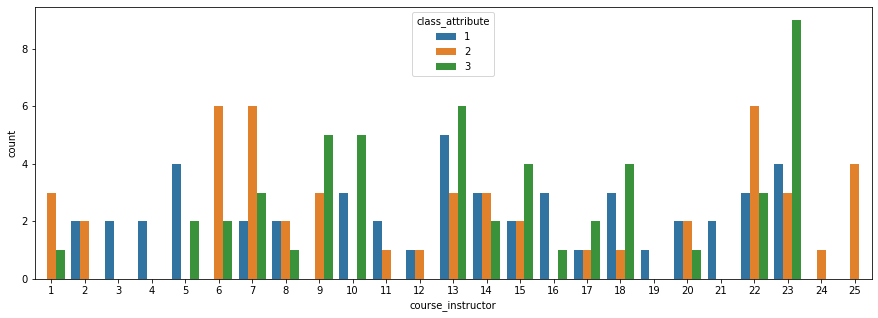

In [23]:
plt.figure(figsize=(15,5), facecolor='white')#To set canvas
sns.countplot(x='course_instructor',hue='class_attribute',data=d)
plt.show()

### Insights : 

1. Course instructor category 23 has maximum number of high performance . 
2. Course category 23 has maximum value count of 16. Among these 16, 8 people have high performance, 3 have medium performance    and 5 have low performance. 

### 3. Numerical feature w.r.t. target variable ( to find count of class attribute w.r.t. class size)

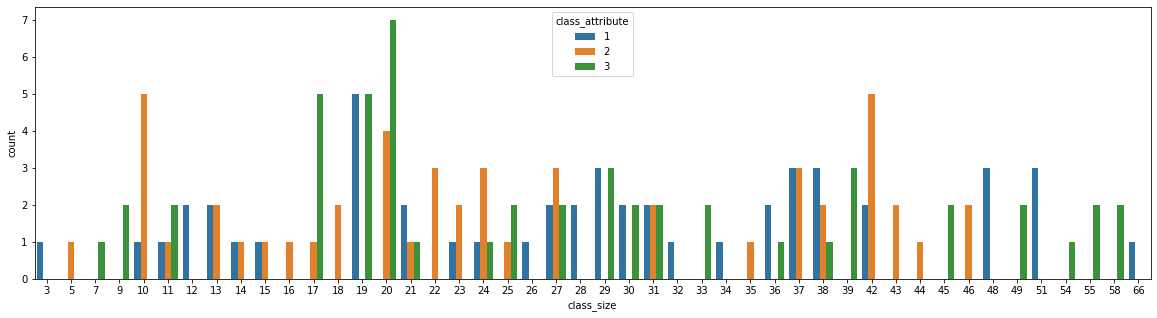

In [24]:
plt.figure(figsize=(20,5), facecolor='white')#To set canvas

sns.countplot(x='class_size',hue='class_attribute',data=d)
plt.show()


### Insights :

1. Maximum number (7) of TA showing high performance belong to class size of 20 and minimum number (1) of TA belongs to class size of 7, 21,24 and 54. We can infer that high performance is shown by TA teaching a class with an optimum class size of 20 students. 

## DATA PRE PROCESSING 

1. There is no imbalance in data
2. No missing values are there. 

In [25]:
##Replacing the class attributes from 1,2,3 to 0,1,2 respectively.

d['class_attribute'].replace([1,2,3],[0, 1, 2], inplace=True)

### 3. Outlier check

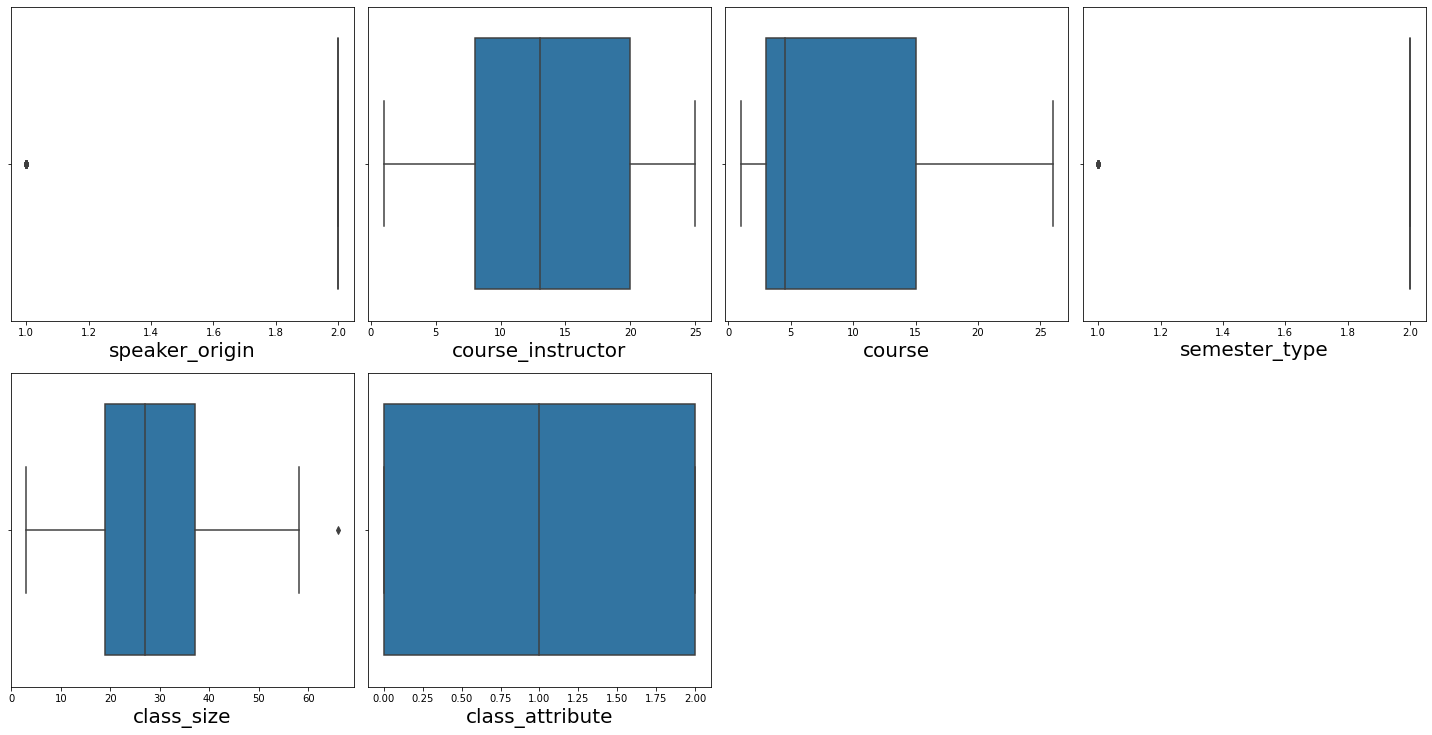

In [26]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in d:#accessing the columns 
    if plotnumber<=20 :
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(x=d[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plotnumber+=1#counter increment
plt.tight_layout()
plt.show()


There is one outlier present in class size. Let's impute the outlier using IQR method.

In [27]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(d.class_size, interpolation = 'midpoint') 

IQR

18.0

In [28]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = d.class_size.quantile(0.25)
# Third quartile (Q3) 
Q3 =d.class_size.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [29]:
min_limit

-8.0

In [30]:
## filetring the data
d.loc[d['class_size'] > max_limit]

,speaker_origin,course_instructor,course,semester_type,class_size,class_attribute
115,2,15,1,2,66,0


In [31]:
## imputing the outlier
d.loc[d['class_size'] > max_limit,'class_size']=np.median(d.class_size)

In [32]:
d.class_size.value_counts()

20    11
19    10
27     8
42     7
17     6
29     6
37     6
31     6
10     6
38     6
24     5
30     4
13     4
11     4
21     4
25     3
39     3
36     3
51     3
48     3
22     3
23     3
33     2
9      2
12     2
15     2
18     2
45     2
14     2
43     2
58     2
46     2
55     2
28     2
49     2
35     1
32     1
34     1
3      1
7      1
54     1
16     1
44     1
5      1
26     1
Name: class_size, dtype: int64

In [33]:
d.loc[d['class_size'] > max_limit]

,speaker_origin,course_instructor,course,semester_type,class_size,class_attribute


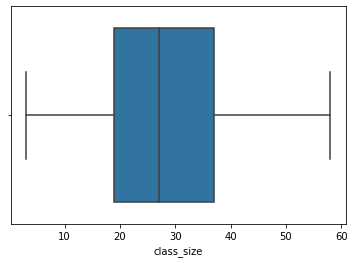

In [34]:
sns.boxplot(x=d.class_size)
plt.show()

## THere are no outliers now

### 4. Feature Selection :

<AxesSubplot:>

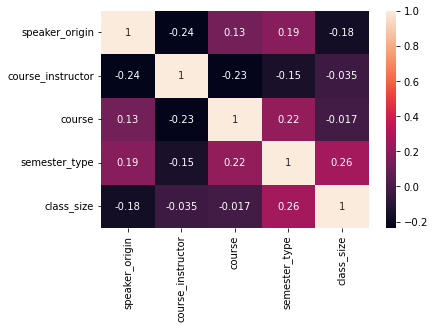

In [35]:
sns.heatmap(d.drop('class_attribute',axis=1).corr(),annot=True)

None of the features are highly correlated to each other, thus we can select all features.

### 5. Applying One Hot encoding to categorical features:

In [36]:
## To scale the categorical data (i.e. range of categorical data in 0 to 1) , one hot encoding is applied.
## Thus , no need to use minmax or standard scaler to scale categorical data.
    
    
d= pd.get_dummies(d, columns=['speaker_origin', 'course_instructor', 'course', 'semester_type'])
d.head()

,class_size,class_attribute,speaker_origin_1,speaker_origin_2,course_instructor_1,course_instructor_2,course_instructor_3,course_instructor_4,course_instructor_5,course_instructor_6,...,course_19,course_20,course_21,course_22,course_23,course_24,course_25,course_26,semester_type_1,semester_type_2
0,17,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,49,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,55,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 6. Scaling numerical feature :

In [37]:
## Scaling numerical feature i.e. class size 
from sklearn.preprocessing import StandardScaler 
scalar=StandardScaler()
d[['class_size']]=scalar.fit_transform(d[['class_size']])

In [38]:
d.head() ## class size features are scaled 

,class_size,class_attribute,speaker_origin_1,speaker_origin_2,course_instructor_1,course_instructor_2,course_instructor_3,course_instructor_4,course_instructor_5,course_instructor_6,...,course_19,course_20,course_21,course_22,course_23,course_24,course_25,course_26,semester_type_1,semester_type_2
0,-0.854029,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.708058,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.427014,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2.188449,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.613833,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## TRAIN -TEST- SPLIT

In [39]:
## Defining X and y and creating dependent and independent variables
x = d.drop(columns = ['class_attribute']) ## independent variable
y = d['class_attribute'] ## Dependent or target variable or the variable which we have to predict

In [44]:
## Train-test-split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

In [45]:
## Shape of x_train,x_test,y_train,y_test
a=x_train.shape
b=x_test.shape
c=y_train.shape
d=y_test.shape
print(a,b,c,d)

(112, 56) (38, 56) (112,) (38,)


## ALGORITHMS APPLIED : 

1. Logistic Regression
2. SVC
3. KNN
4. Decision Tree
5. Naive Bayes 
6. Random Forest
7. XG boost 
8. Neural Network

## 1. LOGISTIC REGRESSION 

In [46]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()#object creation of logistic regression
    
LR.fit(x_train,y_train)#training model with training data

y_train_LR=LR.predict(x_train)
y_test_LR=LR.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,f1_score
print("Train accuracy :",accuracy_score(y_train,y_train_LR))
print("Test accuracy :",accuracy_score(y_test,y_test_LR))

Train accuracy : 0.7321428571428571
Test accuracy : 0.6578947368421053


In [47]:
print(classification_report(y_test,y_test_LR))

              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.83      0.42      0.56        12
           2       0.69      0.73      0.71        15

    accuracy                           0.66        38
   macro avg       0.69      0.66      0.64        38
weighted avg       0.70      0.66      0.65        38



In [48]:
cm_LR=pd.crosstab(y_test,y_test_LR)
cm_LR

col_0,0,1,2
class_attribute,,,
0,9,1,1
1,3,5,4
2,4,0,11


### Hyper parameter tuning of Logistic Regression 

In [49]:
## Hyper parameter tuning 

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

param=[
    {'penalty':['l1','l2'],
     'C' : [1, 10,0.1],
     'solver' : ['lbfgs','liblinear']
        
    }
]

from sklearn.model_selection import GridSearchCV
grid_LR=GridSearchCV(LR,param_grid=param,cv=10,n_jobs=-1)

grid_LR.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 0.1], 'penalty': ['l1', 'l2'],
                          'solver': ['lbfgs', 'liblinear']}])

In [50]:
grid_LR.best_estimator_

LogisticRegression(C=10)

In [59]:
## Applying best parameters 
LR_HT=LogisticRegression(C=10)
LR_HT.fit(x_train,y_train)
y_train_LRH=LR_HT.predict(x_train)
y_test_LRH=LR_HT.predict(x_test)
print("Train accuracy :",accuracy_score(y_train,y_train_LRH))
print("Test accuracy :",accuracy_score(y_test,y_test_LRH))

Train accuracy : 0.7767857142857143
Test accuracy : 0.6052631578947368


In [60]:
print(classification_report(y_test,y_test_LRH))

              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.71      0.42      0.53        12
           2       0.62      0.67      0.65        15

    accuracy                           0.61        38
   macro avg       0.62      0.60      0.60        38
weighted avg       0.63      0.61      0.60        38



In [61]:
cm_LRH=pd.crosstab(y_test,y_test_LRH)
cm_LRH

col_0,0,1,2
class_attribute,,,
0,8,1,2
1,3,5,4
2,4,1,10


## 2. SVC

In [62]:
from sklearn.svm import SVC
svc = SVC() ## base model with default parameters
svc.fit(x_train,y_train)
y_train_svc=svc.predict(x_train)
y_test_svc=svc.predict(x_test)
print("Train accuracy :",accuracy_score(y_train,y_train_svc))
print("Test accuracy :",accuracy_score(y_test,y_test_svc))

Train accuracy : 0.7857142857142857
Test accuracy : 0.5789473684210527


In [63]:
print(classification_report(y_test,y_test_svc))

              precision    recall  f1-score   support

           0       0.50      0.82      0.62        11
           1       0.75      0.25      0.38        12
           2       0.62      0.67      0.65        15

    accuracy                           0.58        38
   macro avg       0.62      0.58      0.55        38
weighted avg       0.63      0.58      0.55        38



In [64]:
cm_svc=pd.crosstab(y_test,y_test_svc)
cm_svc

col_0,0,1,2
class_attribute,,,
0,9,1,1
1,4,3,5
2,5,0,10


### Hyper parameter tuning of SVC

In [65]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning  ## to avoid nan error or fit_estimator error 

from sklearn.model_selection import GridSearchCV

grid_svc = GridSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
}, cv=5, return_train_score=False)

grid_svc.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [67]:
grid_svc.best_estimator_

SVC(C=20, gamma='auto', kernel='linear')

In [68]:
## Applying best parameters 
svc_HT=SVC(C=20, gamma='auto', kernel='linear')
svc_HT.fit(x_train,y_train)
y_train_svh=grid_svc.predict(x_train)
y_test_svh=grid_svc.predict(x_test)
print("Train accuracy :",accuracy_score(y_train,y_train_svh))
print("Test accuracy :",accuracy_score(y_test,y_test_svh))

Train accuracy : 0.8303571428571429
Test accuracy : 0.5526315789473685


In [69]:
print(classification_report(y_test,y_test_svh))

              precision    recall  f1-score   support

           0       0.43      0.55      0.48        11
           1       0.71      0.42      0.53        12
           2       0.59      0.67      0.62        15

    accuracy                           0.55        38
   macro avg       0.58      0.54      0.54        38
weighted avg       0.58      0.55      0.55        38



In [70]:
cm_svh=pd.crosstab(y_test,y_test_svh)
cm_svh

col_0,0,1,2
class_attribute,,,
0,6,1,4
1,4,5,3
2,4,1,10


## 3. KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
## taking optimal k to determine how many nearest neighbors  to create
# create a list to store the error values for each k
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test)) 
    # if predicted value is not equal to actual value, returns true (which is taken as 1) else false(0). 
    # Adds all the value and takes mean of it. So for each k-value, gets the mean of error.
    #print(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

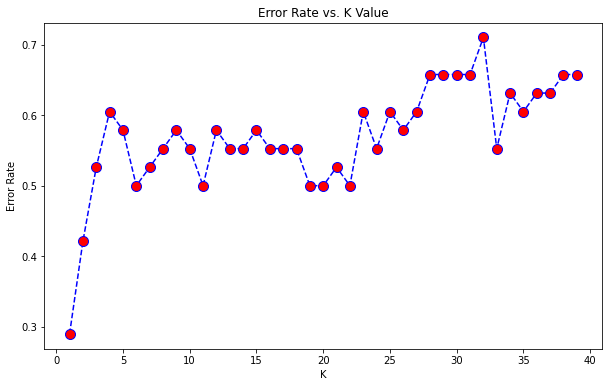

In [72]:
# Lets plot the k-value and error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## We can see that there is lowest error(around 0.5) at k values= 5, 12,19,21 , lets consider k =21 for better accuracy.
## larger no. of k with low error rate can give higher accuracy and odd no. of k is more suitable.

In [73]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
y_train_knn=svc.predict(x_train)
y_test_knn=svc.predict(x_test)
print("Train accuracy :",accuracy_score(y_train,y_train_knn))
print("Test accuracy :",accuracy_score(y_test,y_test_knn))

Train accuracy : 0.7857142857142857
Test accuracy : 0.5789473684210527


In [80]:
print(classification_report(y_test,y_test_knn))

              precision    recall  f1-score   support

           0       0.50      0.82      0.62        11
           1       0.75      0.25      0.38        12
           2       0.62      0.67      0.65        15

    accuracy                           0.58        38
   macro avg       0.62      0.58      0.55        38
weighted avg       0.63      0.58      0.55        38



In [81]:
cm_knn=pd.crosstab(y_test,y_test_knn)
cm_knn

col_0,0,1,2
class_attribute,,,
0,9,1,1
1,4,3,5
2,5,0,10


### Hyper parameter tuning of KNN 

In [74]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

from sklearn.model_selection import GridSearchCV
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv=5, n_jobs = -1)
grid_knn.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=21), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [75]:
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [77]:
## Applying best parameters 
knn_HT=KNeighborsClassifier(n_neighbors=13, weights='distance')
knn_HT.fit(x_train,y_train)
y_train_knt=grid_knn.predict(x_train)
y_test_knt=grid_knn.predict(x_test)
print("Train accuracy :",accuracy_score(y_train,y_train_knt))
print("Test accuracy :",accuracy_score(y_test,y_test_knt))

Train accuracy : 0.9642857142857143
Test accuracy : 0.6842105263157895


In [78]:
print(classification_report(y_test,y_test_knt))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.67      0.67      0.67        12
           2       0.71      0.67      0.69        15

    accuracy                           0.68        38
   macro avg       0.68      0.69      0.68        38
weighted avg       0.69      0.68      0.68        38



In [79]:
cm_knt=pd.crosstab(y_test,y_test_knt)
cm_knt

col_0,0,1,2
class_attribute,,,
0,8,2,1
1,1,8,3
2,3,2,10


## 4. DECISION TREE 

In [84]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(x_train,y_train)#training the model
y_train_dt=dt.predict(x_train)
y_test_dt=dt.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_dt))
print("Test accuracy :",accuracy_score(y_test,y_test_dt))

Train accuracy : 0.9642857142857143
Test accuracy : 0.7105263157894737


In [85]:
print(classification_report(y_test,y_test_dt))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.71      0.83      0.77        12
           2       0.75      0.60      0.67        15

    accuracy                           0.71        38
   macro avg       0.71      0.72      0.71        38
weighted avg       0.71      0.71      0.71        38



In [86]:
cm_dt=pd.crosstab(y_test,y_test_dt)
cm_dt

col_0,0,1,2
class_attribute,,,
0,8,2,1
1,0,10,2
2,4,2,9


### Hyper parameter tuning of Decision Tree

In [87]:
## Hyper parameter tuning of DT

params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 30))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

from sklearn.model_selection import GridSearchCV
grid_dt=GridSearchCV(dt,param_grid=params,cv=10,n_jobs=-1)
grid_dt.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')})

In [88]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=16, splitter='random')

In [89]:
## Applying best parameters 
dth=DecisionTreeClassifier(max_depth=16, splitter='random')
dth.fit(x_train,y_train)
y_train_dth=dth.predict(x_train)
y_test_dth=dth.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_dth))
print("Test accuracy :",accuracy_score(y_test,y_test_dth))

Train accuracy : 0.9196428571428571
Test accuracy : 0.631578947368421


In [90]:
print(classification_report(y_test,y_test_dth))

              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.73      0.67      0.70        12
           2       0.64      0.47      0.54        15

    accuracy                           0.63        38
   macro avg       0.64      0.65      0.63        38
weighted avg       0.64      0.63      0.63        38



In [91]:
cm_dt=pd.crosstab(y_test,y_test_dth)
cm_dt

col_0,0,1,2
class_attribute,,,
0,9,1,1
1,1,8,3
2,6,2,7


## 5. NAIVE BAYES

In [92]:
### Naive Bayes 
# Initialising the model
from sklearn.naive_bayes import GaussianNB   ## Gaussian because ditribution is normal
NB = GaussianNB()
NB.fit(x_train,y_train) # feed data to the model

GaussianNB()

In [93]:
y_train_nb=NB.predict(x_train)
y_test_nb=NB.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_nb))
print("Test accuracy :",accuracy_score(y_test,y_test_nb))

Train accuracy : 0.5803571428571429
Test accuracy : 0.42105263157894735


In [94]:
print(classification_report(y_test,y_test_nb))

              precision    recall  f1-score   support

           0       0.33      0.18      0.24        11
           1       1.00      0.08      0.15        12
           2       0.42      0.87      0.57        15

    accuracy                           0.42        38
   macro avg       0.58      0.38      0.32        38
weighted avg       0.58      0.42      0.34        38



In [95]:
cm_nb=pd.crosstab(y_test,y_test_nb)
cm_nb

col_0,0,1,2
class_attribute,,,
0,2,0,9
1,2,1,9
2,2,0,13


In [96]:
## Hyper parameter tunung of NB 

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_nb = GridSearchCV(estimator=NB, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
grid_nb.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [97]:
grid_nb.best_estimator_

GaussianNB(var_smoothing=0.001)

In [99]:
## Applying best parameters 
nbh=GaussianNB(var_smoothing=0.001)
nbh.fit(x_train,y_train)
y_train_nbh=nbh.predict(x_train)
y_test_nbh=nbh.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_nbh))
print("Test accuracy :",accuracy_score(y_test,y_test_nbh))

Train accuracy : 0.5892857142857143
Test accuracy : 0.4473684210526316


In [100]:
print(classification_report(y_test,y_test_nbh))

              precision    recall  f1-score   support

           0       0.44      0.36      0.40        11
           1       1.00      0.08      0.15        12
           2       0.43      0.80      0.56        15

    accuracy                           0.45        38
   macro avg       0.62      0.42      0.37        38
weighted avg       0.61      0.45      0.38        38



In [101]:
cm_nbh=pd.crosstab(y_test,y_test_nbh)
cm_nbh

col_0,0,1,2
class_attribute,,,
0,4,0,7
1,2,1,9
2,3,0,12


## 6. RANDOM FOREST 

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_train_rf=rf.predict(x_train)
y_test_rf=rf.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_rf))
print("Test accuracy :",accuracy_score(y_test,y_test_rf))

Train accuracy : 0.9642857142857143
Test accuracy : 0.7105263157894737


In [104]:
print(classification_report(y_test,y_test_rf))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.73      0.67      0.70        12
           2       0.69      0.73      0.71        15

    accuracy                           0.71        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.71      0.71      0.71        38



In [105]:
## confusion matrix
cm_rf=pd.crosstab(y_test,y_test_rf)
cm_rf

col_0,0,1,2
class_attribute,,,
0,8,2,1
1,0,8,4
2,3,1,11


In [110]:
## Hyper parameter tuning of random forest 

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_param, n_iter = 100, cv = 5,
                               verbose=2, random_state=12, n_jobs = -1)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=12, verbose=2)

In [111]:
rf_random.best_estimator_

RandomForestClassifier(max_features='auto', n_estimators=400)

In [112]:
## Applying best parameter 
rfh=RandomForestClassifier(max_features='auto', n_estimators=400)
rfh.fit(x_train,y_train)
y_train_rfh=rfh.predict(x_train)
y_test_rfh=rfh.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_rfh))
print("Test accuracy :",accuracy_score(y_test,y_test_rfh))

Train accuracy : 0.9642857142857143
Test accuracy : 0.7105263157894737


In [113]:
print(classification_report(y_test,y_test_rfh))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.73      0.67      0.70        12
           2       0.69      0.73      0.71        15

    accuracy                           0.71        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.71      0.71      0.71        38



In [114]:
## confusion matrix
cm_rf=pd.crosstab(y_test,y_test_rfh)
cm_rf

col_0,0,1,2
class_attribute,,,
0,8,2,1
1,0,8,4
2,3,1,11


## 7. XGBOOST 

In [115]:
!pip3 install xgboost

In [116]:
import xgboost

In [117]:
## importing XG boost  algorithm
from xgboost import XGBClassifier#importing the model library
xgb=XGBClassifier() ## object creation
xgb.fit(x_train,y_train)# fitting the data
y_train_xgb=xgb.predict(x_train)
y_test_xgb=xgb.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_xgb))
print("Test accuracy :",accuracy_score(y_test,y_test_xgb))

Train accuracy : 0.9642857142857143
Test accuracy : 0.7368421052631579


In [168]:
print(classification_report(y_test,y_test_xgb))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.80      0.67      0.73        12
           2       0.77      0.67      0.71        15

    accuracy                           0.74        38
   macro avg       0.75      0.75      0.74        38
weighted avg       0.75      0.74      0.73        38



In [169]:
## confusion matrix
cm_xgb=pd.crosstab(y_test,y_test_xgb)
cm_xgb

col_0,0,1,2
class_attribute,,,
0,10,1,0
1,1,8,3
2,4,1,10


### Hyper parameter tuning for XG boost algorithm

In [173]:
#Hyper parameter tuning for XG boost algorithm
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.3,0.5,0.4],
              'learning_rate': [0.05, 0.010, 0.15, 0.20, 0.25, 0.30],
              'max_depth': [5,6,7,8,9,10,11,12,13,14,15],
              'min_child_weight':[1, 3, 5, 7],
            'colsample_bytree':[0.3,0.4,0.5,0.7]}


xg_random= RandomizedSearchCV(estimator=xgb, scoring='f1',param_distributions=param_grid, n_iter=100, cv=5, 
                               verbose=2, random_state=12, n_jobs=-1)
                               
                        
xg_random.fit(x_train, y_train)##training data on

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           num_parallel_tree=1,
                                           objective='multi:softprob',
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0, 0.1, 0.3, 0.5, 0.4],
                                        'learning_rate': [0.05, 0.01, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=12, scoring='f1', verbose=2)

In [174]:
xg_best_params = xg_random.best_params_##it will give you best parameters 
print(f"Best paramters: {xg_best_params})")##printing  best parameters

Best paramters: {'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.3})


In [177]:
## Applying best parameters 
xgh=XGBClassifier( max_depth=9, learning_rate=0.01, gamma= 0,
                 colsample_bytree=0.3,min_child_weight=5)
xgh.fit(x_train,y_train)
y_train_xgh=xgh.predict(x_train)
y_test_xgh=xgh.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_xgh))
print("Test accuracy :",accuracy_score(y_test,y_test_xgh))

Train accuracy : 0.5803571428571429
Test accuracy : 0.5263157894736842


## 8. NEURAL NETWORK 

In [121]:
## model creation
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=12) ## model object creation max_iter=Stopping parameter
MLP.fit(x_train,y_train) ## training the data
y_test_proba = MLP.predict_proba(x_test) 
y_test_mlp = MLP.predict(x_test)
y_train_mlp = MLP.predict(x_train)
print("Train accuracy :",accuracy_score(y_train,y_train_mlp))
print("Test accuracy :",accuracy_score(y_test,y_test_mlp))

Train accuracy : 0.875
Test accuracy : 0.6842105263157895


In [122]:
print(classification_report(y_test,y_test_mlp))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.62      0.67      0.64        12
           2       0.65      0.73      0.69        15

    accuracy                           0.68        38
   macro avg       0.71      0.68      0.69        38
weighted avg       0.70      0.68      0.69        38



In [123]:
## confusion matrix
cm_mlp=pd.crosstab(y_test,y_test_mlp)
cm_mlp

col_0,0,1,2
class_attribute,,,
0,7,2,2
1,0,8,4
2,1,3,11


### Hyper parameter tuning of MLP classifier

In [126]:
mlp_param  = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
mlp_grid = GridSearchCV(MLP, mlp_param, n_jobs=-1, cv=5)
mlp_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(50, 3),
                                     learning_rate_init=0.1, max_iter=100,
                                     random_state=12),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [127]:
mlp_grid.best_estimator_

MLPClassifier(hidden_layer_sizes=(20,), learning_rate_init=0.1, max_iter=100,
              random_state=12, solver='sgd')

In [129]:
## Applying best parameter 
mlph=MLPClassifier(hidden_layer_sizes=(20,), learning_rate_init=0.1, max_iter=100, random_state=12, solver='sgd')
mlph.fit(x_train,y_train)
y_train_mlph=mlph.predict(x_train)
y_test_mlph=mlph.predict(x_test)#prediction
print("Train accuracy :",accuracy_score(y_train,y_train_mlph))
print("Test accuracy :",accuracy_score(y_test,y_test_mlph))

Train accuracy : 0.8928571428571429
Test accuracy : 0.631578947368421


In [130]:
print(classification_report(y_test,y_test_mlph))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.58      0.58      0.58        12
           2       0.67      0.67      0.67        15

    accuracy                           0.63        38
   macro avg       0.63      0.63      0.63        38
weighted avg       0.63      0.63      0.63        38



In [131]:
## confusion matrix
cm_mlph=pd.crosstab(y_test,y_test_mlph)
cm_mlph

col_0,0,1,2
class_attribute,,,
0,7,2,2
1,2,7,3
2,2,3,10


In [178]:
from tabulate import tabulate

D=[[1,"Logistic Reg",0.66,0.61],
   [2,"SVC", 0.58, 0.55],
   [3,"KNN Classifier", 0.57 , 0.68],
   [4,"Decision Tree", 0.71,0.63],
   [5,"Naive Bayes", 0.42, 0.44],
   [6,"Random Forest", 0.71,0.71],
   [7,"XGBoost", 0.74, 0.52],
    [8,"Neural Network", 0.68,0.63]]

print (tabulate(D, headers=['Sr_No','ML_Algorithm','Accuracy_before_HypT','Accuracy_after_HypT']))

  Sr_No  ML_Algorithm      Accuracy_before_HypT    Accuracy_after_HypT
-------  --------------  ----------------------  ---------------------
      1  Logistic Reg                      0.66                   0.61
      2  SVC                               0.58                   0.55
      3  KNN Classifier                    0.57                   0.68
      4  Decision Tree                     0.71                   0.63
      5  Naive Bayes                       0.42                   0.44
      6  Random Forest                     0.71                   0.71
      7  XGBoost                           0.74                   0.52
      8  Neural Network                    0.68                   0.63


The accuracy after hyper parameter tuning is a bit improved only for models: KNN and Naive Bayes; however these models are not performing good.
For remaining algorithms, the default parameters are showing good accuracy than accuracy after hyper parameter tuning.


### For this data set, the algorithms showing better performance are:
1. XGBoost
2. Random Forest
3. Decision Tree
4. Neural Network



### Let's apply straified cross validation score to the performance of these algorithms

In [197]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5)

In [195]:
dt_cv=cross_val_score(dt,x,y,cv=skfold)
xgb_cv=cross_val_score(xgb,x,y,cv=skfold)
rf_cv=cross_val_score(rf,x,y,cv=skfold)
nn_cv=cross_val_score(MLP,x,y,cv=skfold)

print("Cross val score for DT:", dt_cv)
print("Cross val score for xgb:", xgb_cv)
print("Cross val score for rf:", rf_cv)
print("Cross val score for NN:", nn_cv)

Cross val score for DT: [1.         0.93333333 0.66666667 0.43333333 0.4       ]
Cross val score for xgb: [0.96666667 0.96666667 0.83333333 0.4        0.33333333]
Cross val score for rf: [1.         0.96666667 0.7        0.43333333 0.43333333]
Cross val score for NN: [0.9        0.73333333 0.7        0.5        0.33333333]


In [196]:
q=np.mean(dt_cv)
r=np.mean(xgb_cv)
s=np.mean(rf_cv)
t=np.mean(nn_cv)
print("Mean of Cross val score for DT:", q)
print("Mean of Cross val score for xgb:", r)
print("Mean of Cross val score for rf:", s)
print("Mean of Cross val score for nn:", t)

Mean of Cross val score for DT: 0.6866666666666666
Mean of Cross val score for xgb: 0.7
Mean of Cross val score for rf: 0.7066666666666668
Mean of Cross val score for nn: 0.6333333333333333


In [4]:
import pandas as pd
from tabulate import tabulate

L={ 'Algorithms': ['Ranfom Forest','XGBoost','Decision tree','Neural Networl'],
     'Mean of Cross validation Scores': [0.706,0.7,0.686,0.633]}

df=pd.DataFrame(L)
df=pd.DataFrame(L,index=[1,2,3,4])
df

,Algorithms,Mean of Cross validation Scores
1,Ranfom Forest,0.706
2,XGBoost,0.700
3,Decision tree,0.686
4,Neural Networl,0.633


## Best cross validation score is shown by random forest. Thus, random forest model is best suited for this data set followed by xgboost.

## Challenges faced :

1. 'Invalid classes infered from unique values of y', this error occured while applying xgboost. To overcome this error,          replace function was used to map unique values of target variable y from 1,2,3 to 0,1,2.
2. from sklearn.exceptions import FitFailedWarning : this helped to remove the estimator fit failed error ,while applying Grid    Search CV.
3. Overfitting issue was faced. To deal with this: kfold, leave one out and stratified cross validation techniques were            applied. Among these stratified cross validation performance was better and thus we considered stratified CV.
4. The cross validation scores were not to the expected level. Different test sizes were applied in the train test split to        check all model performances.( for eg. test size=0.2,0.3,0.4.etc). Better performance was shown by models for                  test size =0.25. 
5. The test accuracy might be improved more if we have large number of data to train the model.